# **Lecture 12 - Loops - Apply Family**

---

<br>

### Packages

In [ ]:
# none

<br>

<br>

---

<br>

### Apply family of functions

* The prior lecture covered loops, which is a mechanism used in many other languages

* R conveniently has a family of functions called the `apply` family, which performs implicit looping

* Most of the time, we can use these functions instead of creating our own for loops!

<br>

* Today, we will cover the following four apply family functions

  * `apply()`
    * It takes a data structure, a margin (specifying whether to operate along rows or columns), and a function to apply. It returns a vector or matrix depending on the input and the margin.
  
  * `lapply()` - List Apply
    * This function applies a function to each element of a list, returning a list of the results. It maintains the structure of the input list.

  * `sapply()` - Simple Apply
    * Similar to lapply, but it attempts to simplify the output if possible, returning a vector or matrix instead of a list. This is useful when the output of the function is consistent across all elements.

  * `tapply` - Table Apply
    * This function applies a function to elements grouped by a factor or categorical variable, returning a table of results.

* We will also cover the powerful `do.call()` function

<br>

<br>

---

<br>

### `apply()`

* The `apply()` function applies a function to the rows or the columns of a matrix or dataframe and outputs a vector or list

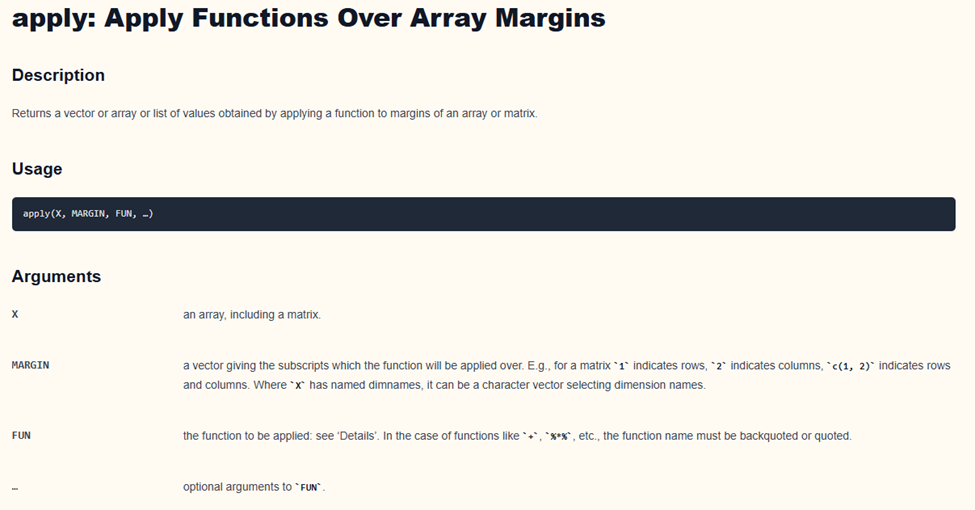

<br>

* Find the mean of each row of the `mtcars` data frame

In [ ]:
# view first few lines of data frame
head(mtcars)

<br>

In [ ]:
# find mean of each row, 1 = row
rowmeans <- apply(mtcars, 1, mean)
print(rowmeans)

<br>

Use `data.frame()` to convert the output vector to a dataframe.

In [ ]:
# find mean of each row
rowmeans <- apply(mtcars, 1, mean)
rowmeans <- data.frame(rowmeans)
head(rowmeans)

<br>

* Note that the above doesn't make much sense!

* It makes more sense to average each column of the data frame since values within a column are the same units of measurement

In [ ]:
# find mean of each column, 2 = column
colmeans <- apply(mtcars, 2, mean)
print(colmeans)

<br>

Use `data.frame()` to convert the output vector to a dataframe.

In [ ]:
# find mean of each column
colmeans <- apply(mtcars, 2, mean)
colmeans <- data.frame(colmeans)

head(colmeans)

<br>

<br>

---

<br>

### `lapply()`



* The `lapply()` function applies a function to each element of a list and outputs another list

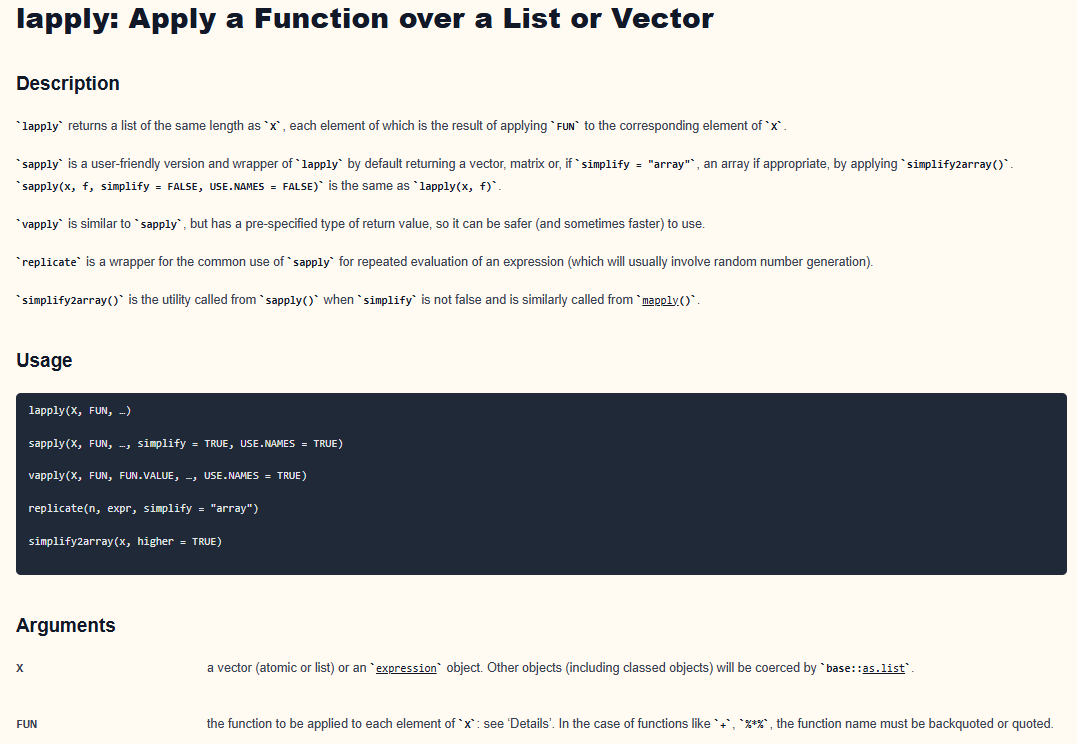

<br>

* Remember that a dataframe is a structured list!

* We can use `lapply()` find the mean of each variable in the data frame

In [ ]:
# Find th mean of each column
lapply(mtcars, mean)

In [ ]:
# Converting unstructured list to a data frame
data.frame(lapply(mtcars, mean))

<br>

<br>

---

<br>

### `sapply()`

* The `sapply()` function is very similar to the `lapply()` function

* However, `sapply()` outputs a vector or matrix instead of an unstructured list

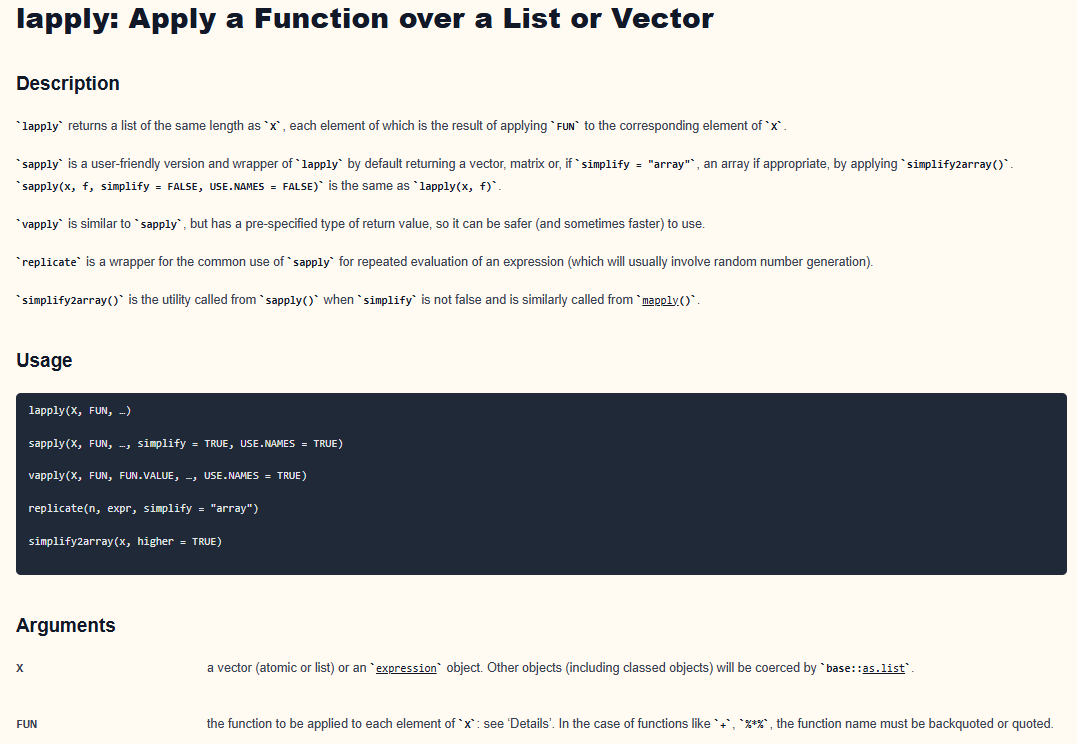

<br>

* Similar to `lapply()`, we can use `sapply()` to find the mean of each variable in the data frame

* Note the output is now a vector

In [ ]:
# find the mean of each column
print(sapply(mtcars, mean))

<br>

<br>

---

<br>

### `tapply()`


* The `tapply()` functions applies a function for each factor level in a variable

* This function is very useful!

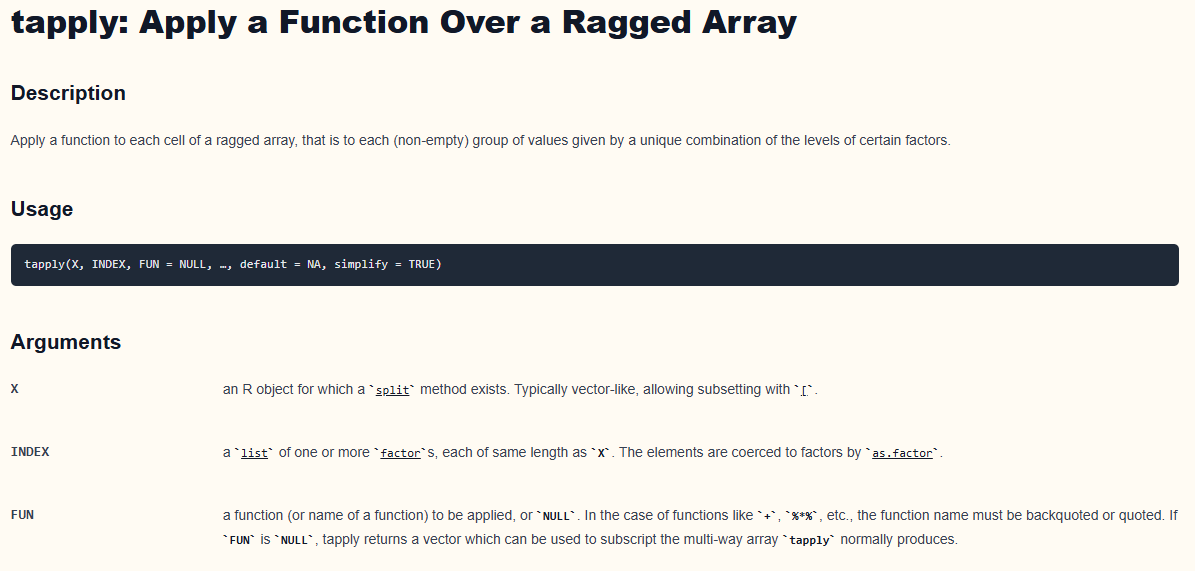

<br>

* For example, we can use `tapply()` to calculate the average mpg for each cylinder engine

In [ ]:
# means for each cylinder
cyl_means <- tapply(mtcars$mpg, mtcars$cyl, mean)
print(cyl_means)

<br>

<br>

---

<br>

### Custom Functions and the `apply()` Family


* Thus far, all we have done is calculate averages

* However, the `apply()` family can use different functions as well...even custom functions!

* The major challenge is understanding
  1. the appropriate inputs to the function
  2. the expected output of the function

<br>

#### Examples


* Finding the maximum of each variable using `apply()`

In [ ]:
# find maximum of each variable
print(apply(mtcars, 2, max))

<br>

* Finding the minimum of each variable using `lapply()`

In [ ]:
lapply(mtcars, max)

<br>

* Finding the median of each variable using `sapply()`

In [ ]:
print(sapply(mtcars, max))

<br>

* Finding the quantiles of the `mpg` variable by the number of cylinders using `tapply()`

In [ ]:
print(tapply(mtcars$mpg, mtcars$cyl, quantile))

<br>

<br>

#### Custom Function Example


* We can build our own function to summarize the data

* For example, `mean()`, `min()`, and `max()` are built-in functions in R, but we can build our own functions to be used by the apply family

<br>

In [ ]:
# define our own function
vector_summary <- function(x) {

  # calculate descriptive statistics
  mean_out <- mean(x)
  min_out  <- min(x)
  max_out  <- max(x)

  # combine into a vector
  output <- c(mean_out, min_out, max_out)

  # return summary
  return(output)
}

In [ ]:
# apply function to mpg for each unique cylinder
mpg_summary <- tapply(mtcars$mpg, mtcars$cyl, vector_summary)
mpg_summary

<br>

<br>

---

<br>

### `do.call()`


* The function `do.call()` can be used to combine elements of a list using a specified function

* For example, if we want to concatenate the elements of a list

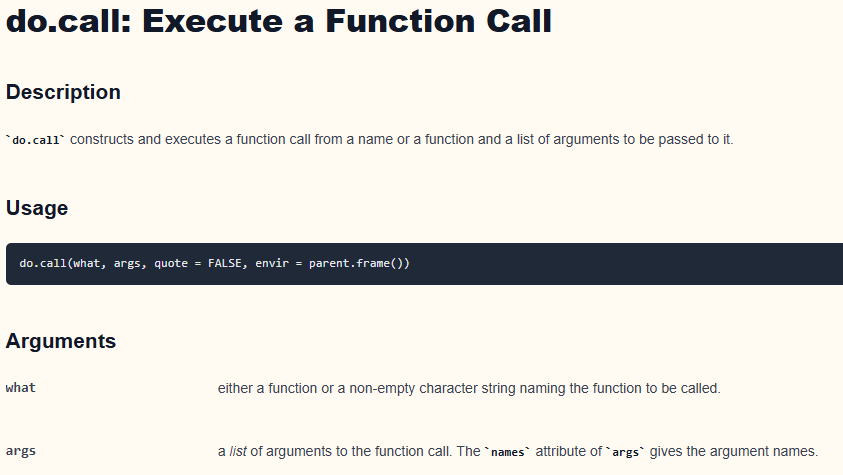

<br>

* For example, we can use `do.call()` to combine the following output into a data summary table

In [ ]:
# summary table
mpg_summary <- tapply(mtcars$mpg, mtcars$cyl, vector_summary)
mpg_summary

In [ ]:
# row bind each summary in the unstructured list
mpg_summary <- do.call(rbind, mpg_summary)
mpg_summary

<br>

* We can now continue organizing the output for viewing

In [ ]:
# convert to a data frame
mpg_summary <- data.frame(mpg_summary)
mpg_summary

In [ ]:
# change column names
names(mpg_summary) <- c("mean", "min", "max")
mpg_summary

In [ ]:
# change row names
rownames(mpg_summary) <- paste(c(4, 6, 8), "cyl", sep="")
mpg_summary